In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp "/content/drive/MyDrive/TwiBot-20/Twibot-20.zip" "data.zip"
!unzip data.zip

Archive:  data.zip
   creating: Twibot-20/
  inflating: Twibot-20/dev.json      
  inflating: Twibot-20/LICENSE       
  inflating: Twibot-20/README.txt    
  inflating: Twibot-20/support.json  
  inflating: Twibot-20/test.json     
  inflating: Twibot-20/train.json    
  inflating: Twibot-20/TwiBot-20 Seed Users.txt  


In [4]:
import pandas as pd
import numpy as np
import random

In [5]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
train = pd.read_json('/content/Twibot-20/train.json')
test = pd.read_json('/content/Twibot-20/test.json')
#support = pd.read_json('/content/Twibot-20/support.json')
#dev = pd.read_json('/content/Twibot-20/dev.json')

In [7]:
dev = pd.read_json('/content/Twibot-20/dev.json')

In [8]:
train_tweet = train[['tweet', 'label']]
test_tweet = test[['tweet', 'label']]

In [9]:
dev_tweet = dev[['tweet', 'label']]

In [10]:
bots_train = train_tweet[train_tweet['label'] == 1].reset_index(drop = True)

In [11]:
genuine_train = train_tweet[train_tweet['label'] == 0].reset_index(drop = True)

In [12]:
bots_train

,tweet,label
0,None,1
1,[RT @VonteThePlug: Yeah but he ain’t got one h...,1
2,[https://t.co/KWnKV9F0fw\n],1
3,[RT @toadmeister: If the BBC is investing £100...,1
4,"[@BrightskinMacky 😂😂😂\n, Bone what??? 😂😂😂 RT @...",1
...,...,...
4641,[Love &amp; Entrepreneurship: Relationship The...,1
4642,[@C130Matt I think I heard a voice from out in...,1
4643,[@savage_esquire That's unfuckingbelievable.\n...,1
4644,[@Jomboy_ Doesn’t want to pull anymore Hammys\...,1


In [13]:
genuine_train

,tweet,label
0,[RT @CarnivalCruise: 🎉 Are you ready to see wh...,0
1,[RT @realDonaldTrump: THANK YOU #RNC2020! http...,0
2,[A family fears they may have been cheated out...,0
3,"[RT @elonmusk: Aloha, welcome back from space ...",0
4,[So amazing to see what @yael and @CitizenApp ...,0
...,...,...
3627,"[@JOHNSHIP99 @gunsnroses @Aerosmith It was.\n,...",0
3628,[I agree. Go home at sundown. No more rioting ...,0
3629,[@tomilahren imagine if Humayun Khan died in B...,0
3630,"[This #LaborDayWeekend, binge-watch the East S...",0


In [21]:
bots_train.dropna(how = 'any', axis = 0, inplace = True)
bots_train.reset_index(drop = True, inplace = True)

In [22]:
bots_train

,tweet,label
0,[RT @VonteThePlug: Yeah but he ain’t got one h...,1
1,[https://t.co/KWnKV9F0fw\n],1
2,[RT @toadmeister: If the BBC is investing £100...,1
3,"[@BrightskinMacky 😂😂😂\n, Bone what??? 😂😂😂 RT @...",1
4,"[Milano pigliatutto. Dopo l’ex Banco Popolare,...",1
...,...,...
4626,[Love &amp; Entrepreneurship: Relationship The...,1
4627,[@C130Matt I think I heard a voice from out in...,1
4628,[@savage_esquire That's unfuckingbelievable.\n...,1
4629,[@Jomboy_ Doesn’t want to pull anymore Hammys\...,1


In [23]:
genuine_train.dropna(how = 'any', axis = 0, inplace = True)
genuine_train.reset_index(drop = True, inplace = True)

In [24]:
# bots_text = pd.DataFrame()
# for i in range(len(bots_train['tweet'])):
#   l = bots_train['tweet'][i]
#   if l is not None:
#     lis = bots_train['tweet'][i]
#     for j in range(len(lis)):
#       text = lis[j]
#       bots_text.loc[i, 'tweet'] = text
#       bots_text.loc[i, 'label'] = 1
# bots = bots_text.copy()
bots_traincp = bots_train.copy()
genuine_traincp = genuine_train.copy()

In [25]:
# n_samples = 5
# k = 0
# bots_text = pd.DataFrame()
# for i in range(len(bots_traincp['tweet'])):
#   l = bots_traincp['tweet'][i]
#   #print(l)
#   if l is not None:
#     if len(l) < n_samples:
#       lis = l
#     else:
#       lis = random.sample(l, n_samples)
#     for j in range(len(lis)):
#       text = lis[j]
#       bots_text.loc[k, 'tweet'] = text
#       bots_text.loc[k, 'label'] = 1
#       k += 1
bots_traincp.loc[:, 'tweet'] = ""
for i in range(len(bots_train['tweet'])):
  l = bots_train['tweet'][i]
  temp = ""
  for j in range(len(l)):
    text = l[j]
    temp = temp + text
  bots_traincp.loc[i, 'tweet'] = bots_traincp.loc[i, 'tweet'] + temp

In [26]:
bots_traincp

,tweet,label
0,RT @VonteThePlug: Yeah but he ain’t got one ha...,1
1,https://t.co/KWnKV9F0fw\n,1
2,RT @toadmeister: If the BBC is investing £100 ...,1
3,@BrightskinMacky 😂😂😂\nBone what??? 😂😂😂 RT @sun...,1
4,"Milano pigliatutto. Dopo l’ex Banco Popolare, ...",1
...,...,...
4626,Love &amp; Entrepreneurship: Relationship Ther...,1
4627,@C130Matt I think I heard a voice from out in ...,1
4628,@savage_esquire That's unfuckingbelievable.\nI...,1
4629,@Jomboy_ Doesn’t want to pull anymore Hammys\n...,1


In [27]:
# genuine_text = pd.DataFrame()
# k = 0
# for i in range(len(genuine_train['tweet'])):
#   l = genuine_train['tweet'][i]
#   if l is not None:
#     lis = genuine_train['tweet'][i]
#     for j in range(len(lis)):
#       text = lis[j]
#       genuine_text.loc[i, 'tweet'] = text
#       genuine_text.loc[i, 'label'] = 0
# genuine = genuine_text.copy()


In [28]:
# n_samples = 5
# k = 0
# genuine_text = pd.DataFrame()
# for i in range(len(genuine_traincp['tweet'])):
#   l = genuine_traincp['tweet'][i]
#   #print(l)
#   if l is not None:
#     if len(l) < n_samples:
#       lis = l
#     else:
#       lis = random.sample(l, n_samples)
#     for j in range(len(lis)):
#       text = lis[j]
#       genuine_text.loc[k, 'tweet'] = text
#       genuine_text.loc[k, 'label'] = 1
#       k += 1
# bots = bots_text.copy()
# genuine = genuine_text.copy()
genuine_traincp.loc[:, 'tweet'] = ""
for i in range(len(genuine_train['tweet'])):
  l = genuine_train['tweet'][i]
  temp = ""
  for j in range(len(l)):
    text = l[j]
    temp = temp + text
  genuine_traincp.loc[i, 'tweet'] = genuine_traincp.loc[i, 'tweet'] + temp

In [29]:
genuine_traincp

,tweet,label
0,RT @CarnivalCruise: 🎉 Are you ready to see wha...,0
1,RT @realDonaldTrump: THANK YOU #RNC2020! https...,0
2,A family fears they may have been cheated out ...,0
3,"RT @elonmusk: Aloha, welcome back from space 💫...",0
4,So amazing to see what @yael and @CitizenApp a...,0
...,...,...
3587,@JOHNSHIP99 @gunsnroses @Aerosmith It was.\nRT...,0
3588,I agree. Go home at sundown. No more rioting a...,0
3589,@tomilahren imagine if Humayun Khan died in Be...,0
3590,"This #LaborDayWeekend, binge-watch the East Si...",0


In [30]:
bots_text = bots_traincp.copy()
genuine_text = genuine_traincp.copy()

In [31]:
bots_text['tweet'] = bots_text['tweet'].str.lower()

In [32]:
genuine_text['tweet'] = genuine_text['tweet'].str.lower()

In [33]:
bots_text['tweet'].tail()

4626    love &amp; entrepreneurship: relationship ther...
4627    @c130matt i think i heard a voice from out in ...
4628    @savage_esquire that's unfuckingbelievable.\ni...
4629    @jomboy_ doesn’t want to pull anymore hammys\n...
4630    the sports card market is unreal right now. pu...
Name: tweet, dtype: object

In [34]:
# stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
#              'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
#              'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
#              'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
#              'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
#              'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
#              'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
#              'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
#              'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
#              't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
#              'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
#              'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
#              'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
#              'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
#              "youve", 'your', 'yours', 'yourself', 'yourselves']

In [38]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [39]:
# STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
bots_text['tweet'] = bots_text['tweet'].apply(lambda text: cleaning_stopwords(text))
bots_text['tweet'].head()

0    rt @vontetheplug: yeah ain’t got one happy son...
1                              https://t.co/kwnkv9f0fw
2    rt @toadmeister: bbc investing £100 million in...
3    @brightskinmacky 😂😂😂 bone what??? 😂😂😂 rt @suns...
4    milano pigliatutto. dopo l’ex banco popolare, ...
Name: tweet, dtype: object

In [40]:
genuine_text['tweet'] = genuine_text['tweet'].apply(lambda text: cleaning_stopwords(text))
genuine_text['tweet'].head()

0    rt @carnivalcruise: 🎉 ready see newest ship’s ...
1    rt @realdonaldtrump: thank #rnc2020! https://t...
2    family fears may cheated $20,000 donations rai...
3    rt @elonmusk: aloha, welcome back space 💫 http...
4    amazing see @yael @citizenapp help covid. #mil...
Name: tweet, dtype: object

In [41]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
bots_text['tweet']= bots_text['tweet'].apply(lambda x: cleaning_punctuations(x))
bots_text['tweet'].tail()

4626    love amp entrepreneurship relationship therapi...
4627    c130matt think heard voice trees say “buschhhh...
4628    savageesquire thats unfuckingbelievable think ...
4629    jomboy doesn’t want pull anymore hammys amyfre...
4630    sports card market unreal right now pulled han...
Name: tweet, dtype: object

In [42]:
genuine_text['tweet']= genuine_text['tweet'].apply(lambda x: cleaning_punctuations(x))
genuine_text['tweet'].tail()

3587    johnship99 gunsnroses aerosmith was rt bkoplos...
3588    agree go home sundown rioting violence action ...
3589    tomilahren imagine humayun khan died benghazi ...
3590    labordayweekend bingewatch east side dave show...
3591    sethgoldberg17 jaysonst fan interference imagi...
Name: tweet, dtype: object

In [43]:
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
bots_text['tweet'] = bots_text['tweet'].apply(lambda x: cleaning_repeating_char(x))
bots_text['tweet'].tail()

4626    love amp entrepreneurship relationship therapi...
4627    130matt think heard voice trees say “buschhhh”...
4628    savageesquire thats unfuckingbelievable think ...
4629    jomboy doesn’t want pull anymore hammys amyfre...
4630    sports card market unreal right now pulled han...
Name: tweet, dtype: object

In [44]:
genuine_text['tweet'] = genuine_text['tweet'].apply(lambda x: cleaning_repeating_char(x))
genuine_text['tweet'].tail()

3587    johnship99 gunsnroses aerosmith was rt bkoplos...
3588    agree go home sundown rioting violence action ...
3589    tomilahren imagine humayun khan died benghazi ...
3590    labordayweekend bingewatch east side dave show...
3591    sethgoldber17 jaysonst fan interference imagin...
Name: tweet, dtype: object

In [45]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
bots_text['tweet'] = bots_text['tweet'].apply(lambda x: cleaning_numbers(x))
bots_text['tweet'].tail()

4626    love amp entrepreneurship relationship therapi...
4627    matt think heard voice trees say “buschhhh” ja...
4628    savageesquire thats unfuckingbelievable think ...
4629    jomboy doesn’t want pull anymore hammys amyfre...
4630    sports card market unreal right now pulled han...
Name: tweet, dtype: object

In [46]:
genuine_text['tweet'] = genuine_text['tweet'].apply(lambda x: cleaning_numbers(x))
genuine_text['tweet'].tail()

3587    johnship gunsnroses aerosmith was rt bkoplos l...
3588    agree go home sundown rioting violence action ...
3589    tomilahren imagine humayun khan died benghazi ...
3590    labordayweekend bingewatch east side dave show...
3591    sethgoldber jaysonst fan interference imagine ...
Name: tweet, dtype: object

In [47]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

bots_text['tweet'] = bots_text['tweet'].apply(lambda x: cleaning_URLs(x))
bots_text['tweet'].tail()

4626    love amp entrepreneurship relationship therapi...
4627    matt think heard voice trees say “buschhhh” ja...
4628    savageesquire thats unfuckingbelievable think ...
4629    jomboy doesn’t want pull anymore hammys amyfre...
4630    sports card market unreal right now pulled han...
Name: tweet, dtype: object

In [48]:
genuine_text['tweet'] = genuine_text['tweet'].apply(lambda x: cleaning_URLs(x))

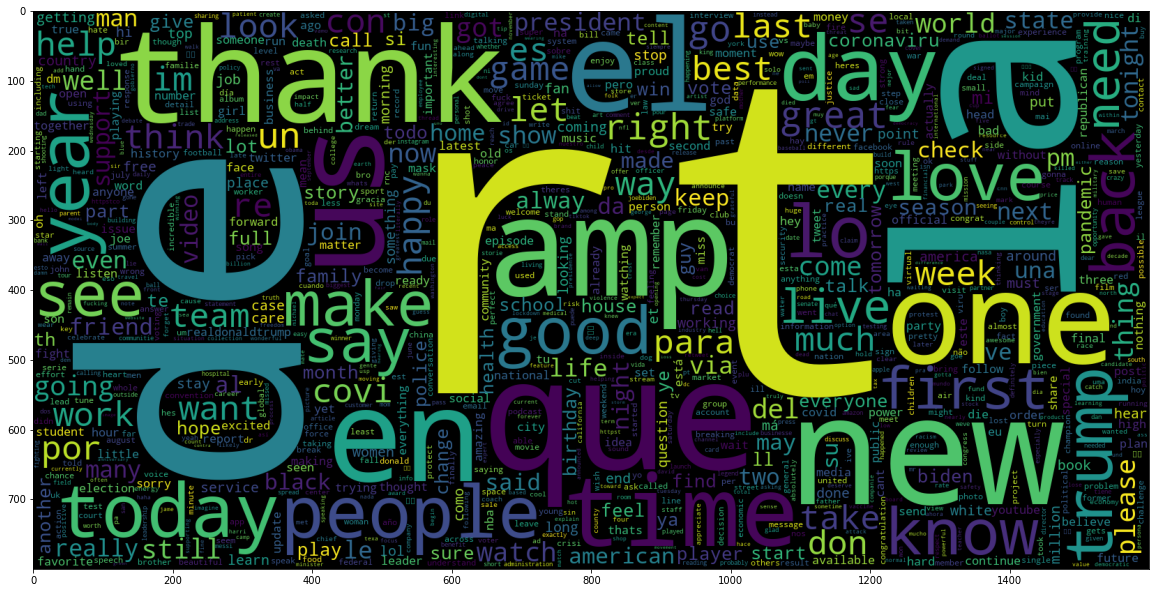

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(genuine_text['tweet']))
plt.imshow(wc)

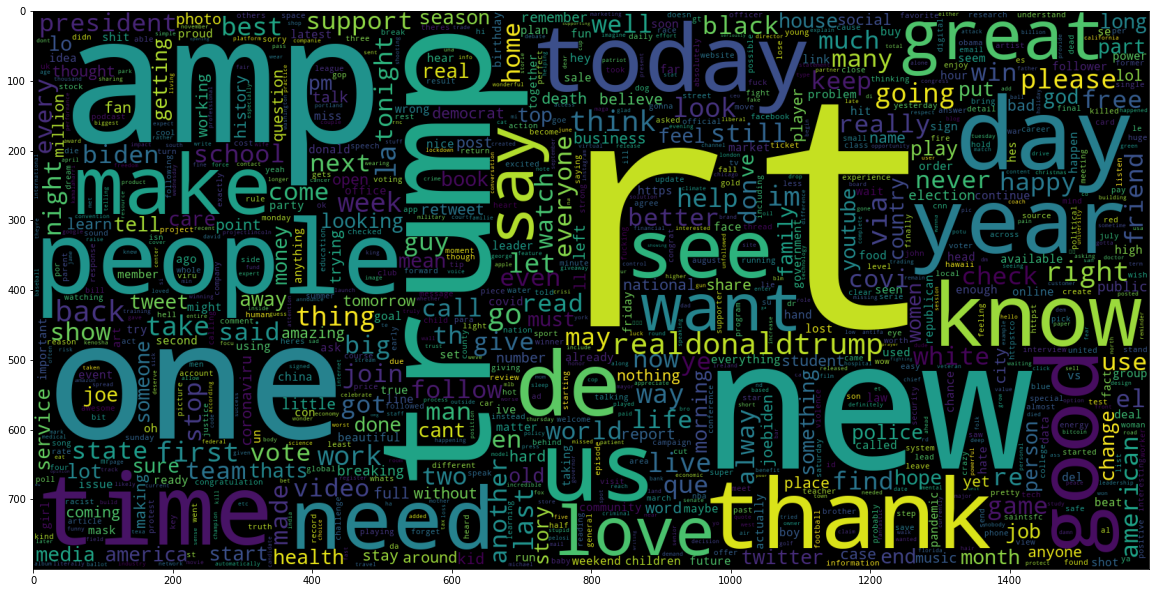

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(bots_text['tweet']))
plt.imshow(wc)

In [51]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
bots_text['tweet'] = bots_text['tweet'].apply(tokenizer.tokenize)
bots_text['tweet'].tail()

4626    [w, w, w, w, w, w, w, w, w, w, w, w, w, w, w, ...
4627    [w, w, w, w, w, w, w, w, w, w, w, w, w, w, w, ...
4628    [w, w, w, w, w, w, w, w, w, w, w, w, w, w, w, ...
4629    [w, w, w, w, w, w, w, w, w, w, w, w, w, w, w, ...
4630    [w, w, w, w, w, w, w, w, w, w, w, w, w, w, w, ...
Name: tweet, dtype: object

In [52]:
genuine_text['tweet'] = genuine_text['tweet'].apply(tokenizer.tokenize)

In [53]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
bots_text['tweet']= bots_text['tweet'].apply(lambda x: stemming_on_text(x))
bots_text['tweet'].head()

0    [w, w, w, w, w, w, w, w, w, w, w, w, w, w, w, ...
1                                               [w, w]
2    [w, w, w, w, w, w, w, w, w, w, w, w, w, w, w, ...
3    [w, w, w, w, w, w, w, w, w, w, w, w, w, w, w, ...
4    [w, w, w, w, w, w, w, w, w, w, w, w, w, w, w, ...
Name: tweet, dtype: object

In [54]:
genuine_text['tweet']= genuine_text['tweet'].apply(lambda x: stemming_on_text(x))
genuine_text['tweet'].head()

0    [w, w, w, w, w, w, w, w, w, w, w, w, w, w, w, ...
1    [w, w, w, w, w, w, w, w, w, w, w, w, w, w, w, ...
2    [w, w, w, w, w, w, w, w, w, w, w, w, w, w, w, ...
3    [w, w, w, w, w, w, w, w, ww, w, w, w, w, w, w,...
4    [w, w, w, w, w, w, w, w, w, w, w, w, w, w, w, ...
Name: tweet, dtype: object

In [55]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [57]:
nltk.download('omw-1.4')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
bots_text['tweet'] = bots_text['tweet'].apply(lambda x: lemmatizer_on_text(x))
bots_text['tweet'].head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


0    [w, w, w, w, w, w, w, w, w, w, w, w, w, w, w, ...
1                                               [w, w]
2    [w, w, w, w, w, w, w, w, w, w, w, w, w, w, w, ...
3    [w, w, w, w, w, w, w, w, w, w, w, w, w, w, w, ...
4    [w, w, w, w, w, w, w, w, w, w, w, w, w, w, w, ...
Name: tweet, dtype: object

In [58]:
genuine_text['tweet'] = genuine_text['tweet'].apply(lambda x: lemmatizer_on_text(x))
genuine_text['tweet'].head()

0    [w, w, w, w, w, w, w, w, w, w, w, w, w, w, w, ...
1    [w, w, w, w, w, w, w, w, w, w, w, w, w, w, w, ...
2    [w, w, w, w, w, w, w, w, w, w, w, w, w, w, w, ...
3    [w, w, w, w, w, w, w, w, ww, w, w, w, w, w, w,...
4    [w, w, w, w, w, w, w, w, w, w, w, w, w, w, w, ...
Name: tweet, dtype: object

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(genuine_text['tweet']))
plt.imshow(wc)

TypeError: ignored

<Figure size 1440x1440 with 0 Axes>

In [61]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(bots_text['tweet']))
plt.imshow(wc)

TypeError: ignored

<Figure size 1440x1440 with 0 Axes>

These are the points that we've talked about in the last meeting.
1. Find out the pattern for tweet types from the tweet text.
2. Try out the 2Tuple frequency analysis again on training dataset after finding out the right pattern for tweet types in point 1. above and then come up with hypothesis and verify it on validation dataset.
3. Add the important features if there are any from the analysis in point 2. to the already built model and rebuild it to find out the results.
4. Try out NLP in tweet text.
5. Lookout for the NLP based Twitter Bot Detection papers.

Work done so far:

I've read the article by twitter related to types of tweets. From the article it says the following are different types of tweets General tweets, tweets mentioning username, reply tweets, retweets, retweets with comments, also known as quote tweets. 
Based on my understanding:
1. Retweet is nothing but tweet text having "RT @someusername:" at the start of the tweet.
2. Quote tweet is nothing but tweet text having "some_text_before RT @someusername:" at the start.
3. Reply tweet have "@" mentioning the users at the start of the text.
4. Tweet is unlike above 3 points. But, a normal tweet can be written so that it actually look like a reply by mentioning username or usernames at the start but it isn't. It is a tweet mentioning usernames.
So, Retweet and quote tweet can be identified based on the pattern but we can't identify the reply tweet is actually a reply tweet or normal tweet that mentions user handles.

In [ ]:
bots_text['tweet'] = bots_text['tweet'].apply(tokenizer.tokenize)
bots_text['tweet'].head()